In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
df = pd.read_csv('ESCORT.csv')

In [9]:
df.head()
df.shape

(2472, 7)

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-18,47.000000,49.500000,47.000000,48.150002,43.445717,10650.0
1,2009-05-19,50.299999,50.299999,43.900002,46.549999,42.002026,1681790.0
2,2009-05-20,46.599998,54.000000,46.000000,53.450001,48.227905,3846980.0
3,2009-05-21,53.400002,58.250000,53.150002,54.400002,49.085091,4495618.0
4,2009-05-22,54.000000,58.500000,54.000000,58.049999,52.378483,2860679.0


In [11]:
df.isnull().values.any()

True

In [12]:
df = df.dropna()

In [13]:
df.isnull().values.any()

False

In [14]:
df.shape

(2465, 7)

/Users/Abhedya/Downloads/ENTER/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


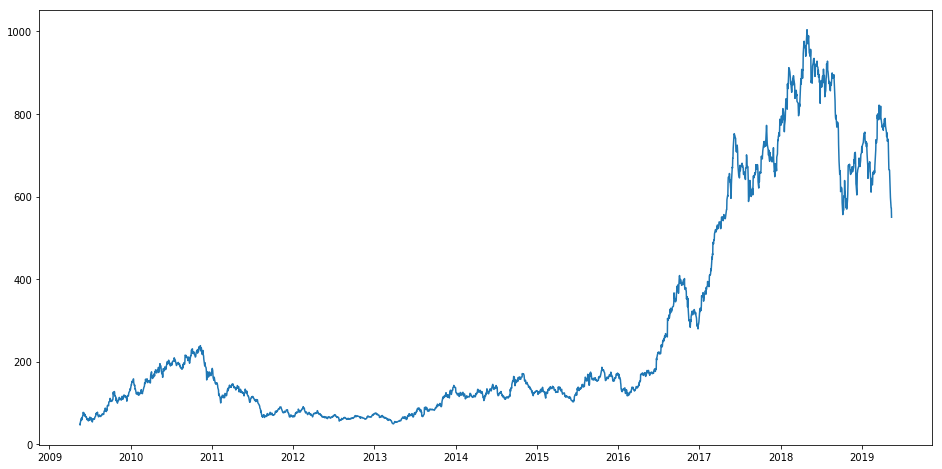

In [15]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df["Date"]

#plot
plt.figure(figsize = (16,8))
plt.plot(df['Close'], label = 'Close Price History')

In [16]:
#creating dataframe with date and the target variable

data = df.sort_index(ascending = True, axis = 0)
new_data = pd.DataFrame(index = range(0, len(df)), 
                        columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [17]:
#splitting into training and validation

train = new_data[:1744]
valid = new_data[1744:]

In [18]:
new_data.shape, train.shape, valid.shape

((2465, 2), (1744, 2), (721, 2))

In [19]:
train["Date"].min(), train["Date"].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2009-05-18 00:00:00'),
 Timestamp('2016-06-09 00:00:00'),
 Timestamp('2016-06-10 00:00:00'),
 Timestamp('2019-05-15 00:00:00'))

In [20]:
#making predictions

preds = []
for i in range(0,437):
    a = train['Close'][len(train)-437+i:].sum() + sum(preds)
    b = a/151
    preds.append(b)

In [21]:
#calculating rmse

# rms = np.sqrt(np.mean(np.power((np.array(valid['Close']) - preds), 2)))
# rms

rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

ValueError: operands could not be broadcast together with shapes (721,) (437,) 

In [22]:
df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending = True, axis = 0)

#creating a seperate dataset"
new_data= pd.DataFrame(index = range(0, len(df)), columns = ['Date', 'Close'])

In [23]:
for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [25]:
#Using LSTM

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1744,:]
valid = dataset[1744:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

ImportError: No module named keras.models

In [16]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

51.77684749921601

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


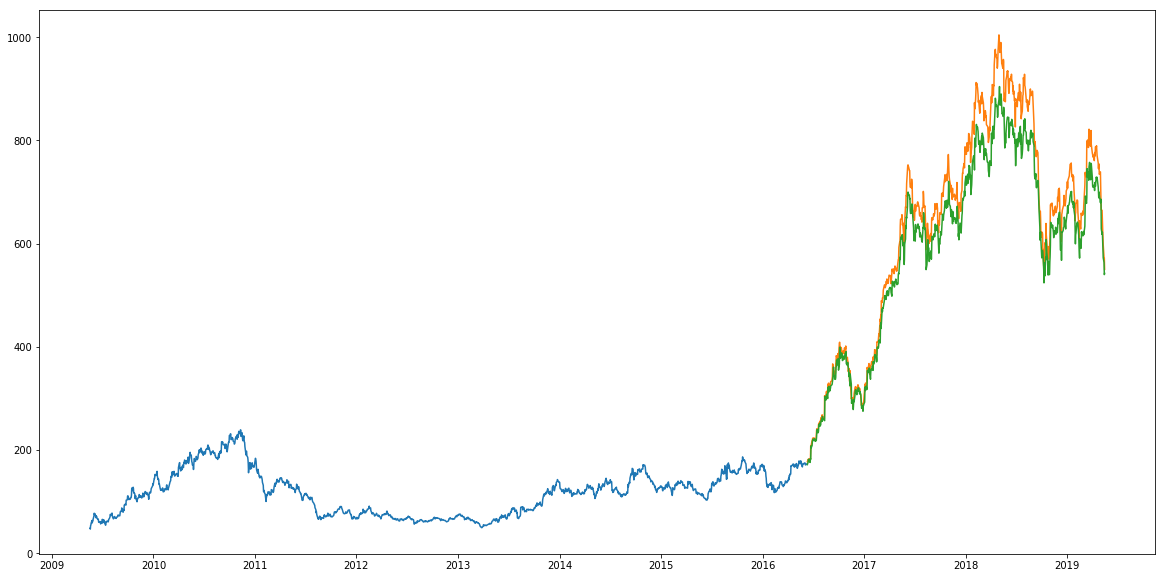

In [18]:
#for plotting
train = new_data[:1744]
valid = new_data[1744:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])